## Project 1 Patricia


In [102]:
#Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt; plt.rcdefaults()
from statsmodels.tools.sm_exceptions import SingularMatrixWarning
import os 
import csv

In [2]:
#get current working directory
os.getcwd()

'/Users/pcr_23/Desktop/GTATL201902DATA3/BootCampG5/Project 1 files'

In [3]:
# os.chdir changes the directory
os.chdir('/Users/pcr_23/Desktop/GTATL201902DATA3/07-Project-1/Project 1 files')

In [4]:
#reduce file is the data with the 37 questions selected
reduced_file = "OSMI_2016_small_df.csv"


df = pd.read_csv(reduced_file)

In [5]:
df.head(2)


,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Do you think that discussing a mental health disorder with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,I don't know,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,25-Jun,1.0,NaN,No,Yes,Yes,Yes,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never


In [6]:
#get columns headers
numcol = len(df.columns.values)


print(f"We have {numcol} columns")

We have 37 columns


In [7]:
# short_col is the dictionary with only the Question number (Example: Q1, Q2 ...)

short_cols = {
                    
       'Are you self-employed?': "Q1" ,
       'How many employees does your company or organization have?': "Q2",
       'Is your employer primarily a tech company/organization?': "Q3",
       'Is your primary role within your company related to tech/IT?': "Q4",
       'Does your employer provide mental health benefits as part of healthcare coverage?': "Q5",
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?':"Q6",
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?':"Q7",
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': "Q8",
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?': "Q9",
       'Would you feel comfortable discussing a mental health disorder with your coworkers?': "Q10",
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': "Q11",
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': "Q12",
       'Do you know local or online resources to seek help for a mental health disorder?': "Q13",
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?':"Q14",
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': "Q15",
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': "Q16",
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': "Q17",
       'Did you feel that your previous employers took mental health as seriously as physical health?': "Q18",
       'Do you feel that being identified as a person with a mental health issue would hurt your career?': "Q19",
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': "Q20",
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?':"Q21",
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?':"Q22" ,
    
        'Do you have a family history of mental illness?':"Q23",
       'Have you had a mental health disorder in the past?':"Q24",
       'Do you currently have a mental health disorder?':"Q25",
       'If yes, what condition(s) have you been diagnosed with?':"Q26",
       'Have you been diagnosed with a mental health condition by a medical professional?':"Q27",
       'If so, what condition(s) were you diagnosed with?':"Q28",
       'Have you ever sought treatment for a mental health issue from a mental health professional?':"Q29",
       'What is your age?':"Q30",
       'What is your gender?': "Q31",
       'What country do you live in?': "Q32",
       'What US state or territory do you live in?': "Q33",
       'What country do you work in?': "Q34",
       'What US state or territory do you work in?':"Q35",
       'Which of the following best describes your work position?':"Q36",
       'Do you work remotely?':"Q37"
                    

}

In [8]:
#create inverse dictionary with a dictionary comprehension
 #we use the inverse dictionary to display questions in our results
long_cols = {v: k for k, v in short_cols.items()}

# long_cols is the dictionary with the question labels as the values
# - can be used to display only the labels in a dataframe
long_cols



{'Q1': 'Are you self-employed?',
 'Q2': 'How many employees does your company or organization have?',
 'Q3': 'Is your employer primarily a tech company/organization?',
 'Q4': 'Is your primary role within your company related to tech/IT?',
 'Q5': 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Q6': 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Q7': 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Q8': 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'Q9': 'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
 'Q10': 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
 'Q11': 'Would you feel comfortable discu

In [9]:
df.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?',
       'Would you feel comfortable discuss

In [10]:
# q_col_df is the dataframe with only the question number as the header (Example: Q1, Q2...)
q_cols_df = df.rename(columns= short_cols)

q_cols_df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,I don't know,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,25-Jun,1.0,NaN,No,Yes,Yes,Yes,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,25-Jun,1.0,NaN,No,No,No,I don't know,Maybe,Maybe,...,NaN,1,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,25-Jun,0.0,1.0,Yes,No,No,No,Yes,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [11]:
raw_df = df.rename(columns= long_cols)
#raw_df.iloc[:5,:17]

# raw df is the data frame with questions as columns
raw_df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Do you think that discussing a mental health disorder with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?",Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,I don't know,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,25-Jun,1.0,NaN,No,Yes,Yes,Yes,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,25-Jun,1.0,NaN,No,No,No,I don't know,Maybe,Maybe,...,NaN,1,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,25-Jun,0.0,1.0,Yes,No,No,No,Yes,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [12]:
# create a for loop to add the question number to the question label 
# (Example: Q1- Are you self-employed?)

qnames_cols = {}
for i in range(0,len(df.columns)):
    qnames_cols[df.columns[i]] =   f"Q{i+1}- {df.columns[i]}"
    
    

In [13]:
qnames_cols

{'Are you self-employed?': 'Q1- Are you self-employed?',
 'How many employees does your company or organization have?': 'Q2- How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?': 'Q3- Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?': 'Q4- Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?': 'Q5- Does your employer provide mental health benefits as part of healthcare coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'Q6- Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seekin

In [14]:
# Create dataframe -the question name and question label 
qnames_df = df.rename(columns= qnames_cols)

#qnames df is the data frame with the question number and the question label
qnames_df.head()

,Q1- Are you self-employed?,Q2- How many employees does your company or organization have?,Q3- Is your employer primarily a tech company/organization?,Q4- Is your primary role within your company related to tech/IT?,Q5- Does your employer provide mental health benefits as part of healthcare coverage?,"Q6- Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Q7- Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Q8- Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Q9- Do you think that discussing a mental health disorder with your employer would have negative consequences?,Q10- Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"Q28- If so, what condition(s) were you diagnosed with?",Q29- Have you ever sought treatment for a mental health issue from a mental health professional?,Q30- What is your age?,Q31- What is your gender?,Q32- What country do you live in?,Q33- What US state or territory do you live in?,Q34- What country do you work in?,Q35- What US state or territory do you work in?,Q36- Which of the following best describes your work position?,Q37- Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,I don't know,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,25-Jun,1.0,NaN,No,Yes,Yes,Yes,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,25-Jun,1.0,NaN,No,No,No,I don't know,Maybe,Maybe,...,NaN,1,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,25-Jun,0.0,1.0,Yes,No,No,No,Yes,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## Patricia's Analysis

In [30]:
#27 - 'Have you been diagnosed with a mental health condition by a medical professional?',
#4 - 'Is your primary role within your company related to tech/IT?',


#qnames_df[]
#q_cols_df

## frecuency of mental health Q27

In [16]:
# frecueny of Mental Health Condition diagnosed by a health professional
q_cols_df["Q27"].value_counts().sum()


1433

## Work position

In [32]:
q_cols_df["Q4"].unique()

array([nan,  1.,  0.])

In [33]:
q_cols_df["Q4"].isnull().sum()
# 1,170 missing values in the work position column (Q4)

1170

In [34]:
q_cols_df["Q4"].value_counts().sum()

263

In [35]:
q_cols_df["Q4"].value_counts(dropna=False)

NaN     1170
 1.0     248
 0.0      15
Name: Q4, dtype: int64

## Create a df with only tech folks (Q4 = 1.0)

In [50]:
# dataframe techfolks only has people in tech tech/IT roles

techfolks_df = q_cols_df[q_cols_df["Q4"]==1.0]
techfolks_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 4 to 1431
Data columns (total 37 columns):
Q1     248 non-null int64
Q2     248 non-null object
Q3     248 non-null float64
Q4     248 non-null float64
Q5     248 non-null object
Q6     248 non-null object
Q7     248 non-null object
Q8     248 non-null object
Q9     248 non-null object
Q10    248 non-null object
Q11    248 non-null object
Q12    248 non-null object
Q13    0 non-null object
Q14    0 non-null object
Q15    0 non-null object
Q16    0 non-null object
Q17    0 non-null object
Q18    215 non-null object
Q19    248 non-null object
Q20    248 non-null object
Q21    232 non-null object
Q22    118 non-null object
Q23    248 non-null object
Q24    248 non-null object
Q25    248 non-null object
Q26    95 non-null object
Q27    248 non-null object
Q28    125 non-null object
Q29    248 non-null int64
Q30    248 non-null int64
Q31    246 non-null object
Q32    248 non-null object
Q33    155 non-null object
Q34    248 non-

## Remove duplicates from a column

In [37]:
Q4_nomiss = q_cols_df["Q4"].dropna()
Q4_nomiss.value_counts()

1.0    248
0.0     15
Name: Q4, dtype: int64

## Create dict to use as label for tables

In [38]:
Q4_dic = {1: "Yes", 0:"No"}

#change 1 to Yes and 0 to NO using .map(dict) and saved in a variable call Q4_nomiss_yn
Q4_nomiss_yn = Q4_nomiss.map(Q4_dic)

In [39]:
# role within your company related to tech/IT
Q4_nomiss_yn.value_counts()

Yes    248
No      15
Name: Q4, dtype: int64

## Data frame filter by tech role (Q4 = 1.0) --which is yes

In [44]:


qcols_GIT = q_cols_df.groupby(by="Q4")
qcols_GIT.head(10)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,No,No,I don't know,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",0,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,25-Jun,1.0,NaN,No,Yes,Yes,Yes,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,25-Jun,1.0,NaN,No,No,No,I don't know,Maybe,Maybe,...,NaN,1,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,25-Jun,0.0,1.0,Yes,No,No,No,Yes,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,NaN,Yes,No,Yes,Yes,Yes,Maybe,...,NaN,1,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,NaN,I don't know,No,No,I don't know,No,Maybe,...,NaN,0,30,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
7,0,More than 1000,1.0,NaN,Yes,No,Yes,Yes,No,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,1.0,I don't know,No,No,I don't know,Yes,Yes,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,30,Male,United States of America,Kentucky,United States of America,Kentucky,One-person shop|Front-end Developer|Back-end D...,Always


In [45]:

#filter df by Q4=1 (IT people)
qcols_GIT = q_cols_df[q_cols_df["Q4"]==1.0]
qcols_GIT.head()


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37
4,0,25-Jun,0.0,1.0,Yes,No,No,No,Yes,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
8,0,26-100,0.0,1.0,I don't know,No,No,I don't know,Yes,Yes,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
11,0,100-500,0.0,1.0,Yes,No,I don't know,I don't know,Yes,No,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,34,Male,United States of America,Pennsylvania,United States of America,Pennsylvania,Executive Leadership,Sometimes
13,0,100-500,0.0,1.0,Yes,Yes,Yes,Yes,No,No,...,NaN,0,44,Male,Canada,NaN,Canada,NaN,DevOps/SysAdmin|Back-end Developer|Front-end D...,Sometimes
19,0,100-500,0.0,1.0,I don't know,No,No,I don't know,Yes,No,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,31,M,United States of America,New Jersey,United States of America,New York,Back-end Developer|Front-end Developer,Sometimes


In [42]:
q_cols_df.groupby(by="Q4")
q_cols_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 37 columns):
Q1     1433 non-null int64
Q2     1146 non-null object
Q3     1146 non-null float64
Q4     263 non-null float64
Q5     1146 non-null object
Q6     1146 non-null object
Q7     1146 non-null object
Q8     1146 non-null object
Q9     1146 non-null object
Q10    1146 non-null object
Q11    1146 non-null object
Q12    1146 non-null object
Q13    287 non-null object
Q14    287 non-null object
Q15    144 non-null object
Q16    287 non-null object
Q17    287 non-null object
Q18    1264 non-null object
Q19    1433 non-null object
Q20    1433 non-null object
Q21    1344 non-null object
Q22    657 non-null object
Q23    1433 non-null object
Q24    1433 non-null object
Q25    1433 non-null object
Q26    568 non-null object
Q27    1433 non-null object
Q28    711 non-null object
Q29    1433 non-null int64
Q30    1433 non-null int64
Q31    1430 non-null object
Q32    1433 non-null object
Q33    

## Persons in Tech roles diagnosed with MH condition by a medical professional 

In [46]:
# Have you been diagnosed with a mental health condition by a medical professional?

#df group by IT people
qcols_GIT

mhcond_ct = qcols_GIT["Q27"].value_counts()
mhcond_ct

Yes    127
No     121
Name: Q27, dtype: int64

In [47]:
# Have you been diagnosed with a mental health condition by a medical professional? in percents

total = mhcond_ct.sum()
total


248

In [48]:
mhcond_p = ( qcols_GIT["Q27"].value_counts()/total )*100
mhcond_p.map("{0:.2f}%".format)


Yes    51.21%
No     48.79%
Name: Q27, dtype: object

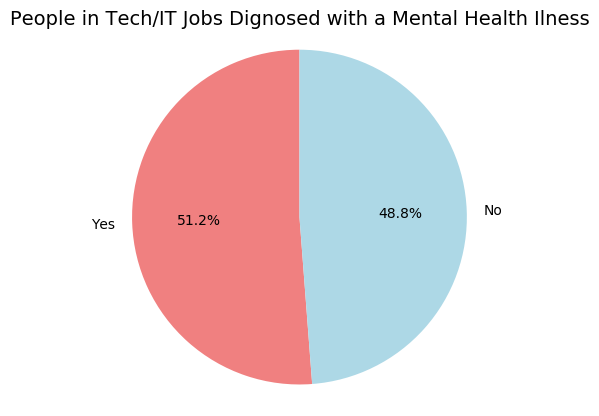

In [221]:
colors=["lightcoral","lightblue"]
labels= ["Yes", "No"]
plt.title("People in Tech/IT Jobs Dignosed with a Mental Health Ilness", fontsize=14, loc='center')
plt.pie(mhcond_p, startangle=90,autopct="%1.1f%%",colors=colors, labels=labels)
#plt.setp(size=8, weight="bold")
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.savefig('Diagnosed_MentalHeatlCondition.svg', format='svg', dpi=1200)
plt.show()
 


In [49]:
mhcond_ct = techfolks_df["Q27"].value_counts()

NameError: name 'techfolks_df' is not defined

In [49]:
techfolks_df["Q4"].value_counts()

1.0    248
Name: Q4, dtype: int64

## What best describes your position Q36

In [68]:
techfolks_df["Q27"].value_counts()

Yes    127
No     121
Name: Q27, dtype: int64

In [71]:
#Filter by people with tech/IT roles diagnosed with mental health condition
techfolks_mh = techfolks_df[techfolks_df["Q27"]== "Yes"]

# Answer: 127 people with tech/IT jobs that have been diagnosed with mental health condition 
# by a health professional
techfolks_mh.head()



,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37
4,0,25-Jun,0.0,1.0,Yes,No,No,No,Yes,Maybe,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
8,0,26-100,0.0,1.0,I don't know,No,No,I don't know,Yes,Yes,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
11,0,100-500,0.0,1.0,Yes,No,I don't know,I don't know,Yes,No,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,34,Male,United States of America,Pennsylvania,United States of America,Pennsylvania,Executive Leadership,Sometimes
19,0,100-500,0.0,1.0,I don't know,No,No,I don't know,Yes,No,...,"Anxiety Disorder (Generalized, Social, Phobia,...",1,31,M,United States of America,New Jersey,United States of America,New York,Back-end Developer|Front-end Developer,Sometimes
26,0,26-100,0.0,1.0,No,No,No,I don't know,Yes,No,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",1,27,Male,Netherlands,NaN,Netherlands,NaN,Supervisor/Team Lead|DevOps/SysAdmin|Back-end ...,Sometimes


In [75]:
#Top 5 positions with people in tech/IT roles that have been diagnosed with mental health illness
top5pos = techfolks_mh["Q36"].value_counts(ascending=False)[0:10]
top5pos



Back-end Developer                                             15
Front-end Developer                                            13
Back-end Developer|Front-end Developer                         11
Other                                                          10
Supervisor/Team Lead                                            9
DevOps/SysAdmin                                                 7
Support                                                         7
Supervisor/Team Lead|Back-end Developer|Front-end Developer     5
Front-end Developer|Designer                                    4
Executive Leadership                                            4
Name: Q36, dtype: int64

In [ ]:
#Create a dictionary with the 5 job positions with more mental health ilness cases
dict_top5pos = {"Back-end Developer":15,
               "Front-end Developer":13,
               "Back-end Developer|Front-end Developer":11,
               "Other " :10,
               "Supervisor/Team Lead":9}

In [51]:
# What you're looking for
values = top5pos.value_counts().keys().tolist()

In [52]:
counts = top5pos.value_counts().tolist()

In [53]:
riskpos= techfolks_mh["Q36"].value_counts()

In [55]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [56]:
type(np.arange(5))

numpy.ndarray

In [ ]:
counts = [15, 13, 11, 10, 9]

colors=["lightblue"]
plt.bar(np.arange(5),counts, color=colors)

names = ["Back-end Developer","Front-end Developer","Back-end & Front-end Developer","Other","Supervisor/Team Lead"]
plt.yticks(np.arange(5),(names),rotation=90)
plt.xlabel("Frequency")
plt.title("Most Common Jobs in Tech/IT with Diagnosis of Mental Health Illness")


plt.savefig('JobsinTech_MHilness.svg', format='svg', dpi=1500,bbox_inches = 'tight')

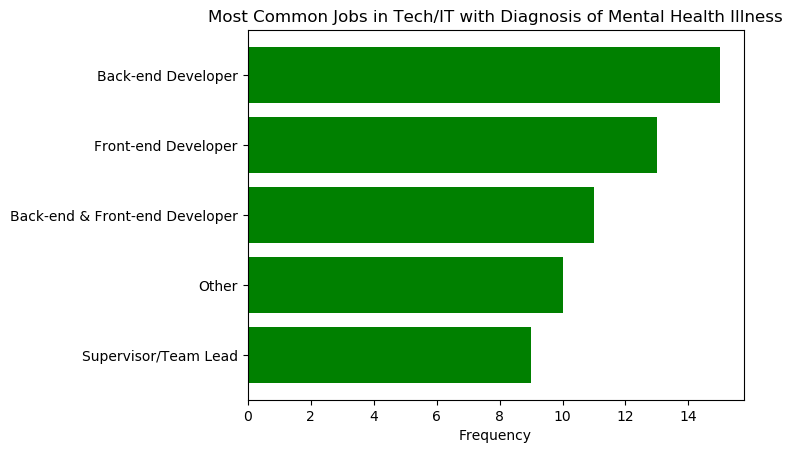

In [219]:

plt.rcdefaults()
fig, ax = plt.subplots()

# # Example data
names = ["Back-end Developer","Front-end Developer","Back-end & Front-end Developer","Other","Supervisor/Team Lead"]
 #people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(names))
frequency = [15, 13, 11, 10, 9]
# error = np.random.rand(len(people))

ax.barh(y_pos, frequency, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Frequency')
ax.set_title('Most Common Jobs in Tech/IT with Diagnosis of Mental Health Illness')



plt.savefig('JobsinTech_MHilnessH.svg', format='svg', dpi=1500,bbox_inches = 'tight')
plt.show()

In [ ]:
# dataframe techfolks only has people in tech tech/IT roles

techfolks_df = q_cols_df[q_cols_df["Q4"]==1.0]
techfolks_df.info()

In [101]:
#5. What’s the relationship between people with a family history of mental illness and people that have been diganosed?

#Mental Health family history
techfolks_df["Q23"].value_counts()


Yes             118
No               78
I don't know     52
Name: Q23, dtype: int64

In [125]:
#Diagnosed with mental health illness and have familly history


techfolks_df["Q27"].value_counts()

Yes    127
No     121
Name: Q27, dtype: int64

In [118]:
techfolks_df["Q23"].value_counts()

Yes             118
No               78
I don't know     52
Name: Q23, dtype: int64

In [156]:
 techfolks_df["Q27"].groupby(["Q23"])

pd.crosstab(columns= [techfolks_df["Q27"],techfolks_df["Q23"]])

KeyError: 'Q23'

<BarContainer object of 3 artists>

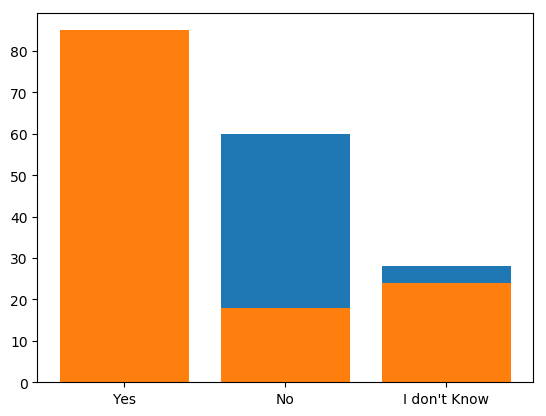

In [196]:
no=[33,60,28]
yes=[85,18,24]
plt.xticks(ticks=[1,2,3],labels=["Yes","No","I don't Know"])

plt.bar(x= np.arange(1,4),height=no, label="No")
plt.bar(x= np.arange(1,4),height=yes, label="Yes")

In [185]:
x = techfolks_df[["Q23","Q27"]].groupby(["Q23", "Q27"]).size()
pd.DataFrame(x, columns= ["Diagnosed"])

Diagnosed
Q23          Q27           
I don't know No          28
             Yes         24
No           No          60
             Yes         18
Yes          No          33
             Yes         85

In [ ]:
# data to plot
n_groups = 4
means_frank = (90, 55, 40, 65)
means_guido = (85, 62, 54, 20)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='Frank')
 
rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='Guido')
 
plt.xlabel('Person')
plt.ylabel('Scores')
plt.title('Scores by person')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D'))
plt.legend()
 
plt.tight_layout()
plt.show()

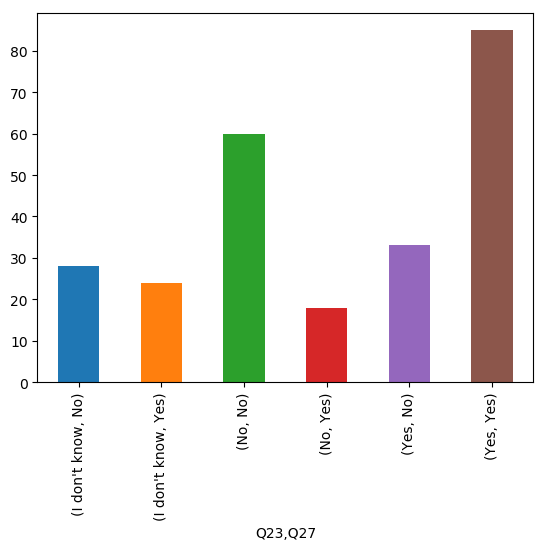

In [177]:

x.plot.bar()

In [ ]:
pd.crosstab(q_cols_df["Q27"], columns=["Mental Health Ilness"], colnames=None)

In [ ]:
pd.crosstab(q_cols_df["Q27"], columns=["Mental Health Ilness"], colnames=None)

In [ ]:
plt.pie(top5pos)
plt.show()

## Q7 & Q8

In [61]:
#Q8- Is your anonymity protected if you choose to take advantage of mental health 
#or substance abuse treatment resources provided by your employer?

techfolks_df["Q8"].value_counts()

I don't know    163
Yes              71
No               14
Name: Q8, dtype: int64

In [59]:
#'Q27': 'Have you been diagnosed with a mental health condition by a medical professional?''
techfolks_df["Q27"].value_counts()

Yes    127
No     121
Name: Q27, dtype: int64

In [54]:
# Q7- Does your employer offer resources to learn more about mental health concerns 
# and options for seeking help?

techfolks_df["Q7"].value_counts()

No              102
Yes              96
I don't know     50
Name: Q7, dtype: int64

In [65]:
#'Q29': 'Have you ever sought treatment for a mental health issue from a mental health professional?'
techfolks_df["Q29"].value_counts()

1    143
0    105
Name: Q29, dtype: int64

In [64]:
believes_anonymity = techfolks_df[(techfolks_df['Q27'] == 'Yes') & (techfolks_df['Q8'] == 'Yes')].groupby('Q31').count()['Q8']
believes_anonymity






Q31
Agender     1
F           3
Female      4
M           1
Male       14
female      3
m           2
male        5
Name: Q8, dtype: int64